# Bombas centrífugas y sistemas de tuberías

Las bombas centrífugas transforman energía electrica en energía mecánica, y consecuentemente suman energía al flujo. El siguiente video explica el funcionamiento de una bomba centrífuga.

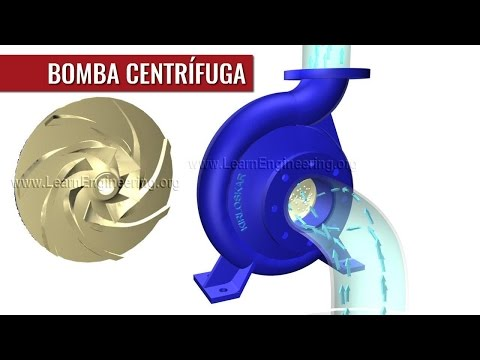

In [66]:
from IPython.display import display
from IPython.display import YouTubeVideo 
YouTubeVideo('SpKuTfw560U')

La figura 1  muestra un sistema de tuberías que extrae agua desde un reservorio  a un estanque ubicado a cota superior. Los niveles inicial y final de energía se representan por la cota de la superficie del agua en el reservorio y el estanque, respectivamente (ambas superficies están en contacto con la atmósfera y sus velocidades son despreciables con respecto a la velocidad en el sistema de tuberías. Entonces, discutamos las siguientes preguntas:

*¿Qué nivel de energía (i.e. altura de presión) debe incorporar la bomba para que el agua fluya por el sistema ($u>0$)?*

*¿Qué función tiene la válvula que se indica en la tubería de impulsión?*

*¿Podrá la bomba ubicarse en cualquier parte del sistema de tuberías?*

<center><img src="https://drive.google.com/uc?export=view&id=1S-gqAQhY6xc-xQ_jkAci8oG-o751a6jE" alt="Sistema de tuberías y bomba" width="800"></center>




**Figura 1.** Sistema de tuberías y bombas para transportar agua desde un reservorio.

El sistema de tuberías se describe matemáticamente utilizando un balance de energía entre las superficies del agua del reservorio y el estanque. 

$$z_R + \frac{p_R}{\gamma} + \frac{u_R^{2}}{2g}  + h_{Bomba}= z_E + \frac{p_E}{\gamma} + \frac{u_E^{2}}{2g} + h_{fRE} + h_{sRE}$$

Entonces:

$$z_R  + h_{Bomba}= z_E + h_{fRE} + h_{sRE}$$

$$ h_{Bomba}= z_E - z_R + h_{fRE} + h_{sRE}$$

$$ h_{Bomba}= H_e + h_{fRE} + h_{sRE}$$

Donde $h_{fRE} = f\frac{L}{D}\frac{u^2}{2g}$; $ h_{sRE} = \sum k\frac{u^2}{2g}$ , y $ \frac{u^2}{2g} = \frac{\left(\frac{Q}{A}\right)^2}{2g} = \frac{Q^2}{2g\left(\frac{\pi D^2}{4}\right)^2} = \frac{8}{g\pi^{2}D^{4}}Q^{2} $, por lo tanto se obtiene la ecuación que representa la **curva del sistema**:




### $$ h_{Bomba} = H_{e} + \left(f\frac{L}{D}+\sum k \right) \frac{8}{g\pi^{2}D^{4}}Q^{2}$$



$H_e$ se denomina la altura estática y representa la diferencia del nivel de energía con $u=0$; el factor de fricción $f$ debe determinarse por alguna de las ecuaciones vistas en clases, $k$ está tabulado según el tipo de pérdida singular, el largo $L$ y el diámetro $D$ son características de la geometría del sistema de tuberías. Entonces, y sobre la base de lo anterior, se obtiene la **curva del sistema $h_{bomba} = f(Q)$ para un rango de valores de $Q$**.

Sabemos que existe una gran variedad de tipos, marcas o modelos de bombas. Entonces como **¿Cómo se define $h_{bomba}$ en la ecuación de la curva del sistema?¿Cuál es el rango de valores de Q que se debe considerar en el análisis?**

La caracterización de las bombas viene dada por el fabricante, y regularmente se expresa por medio de **curvas de funcionamiento o curvas características de la bomba**. Por ejemplo, la figura adjunta corresponde a una bomba marca Taco, modelo 4113 con un funcionamiento a $1160RPM$. Cada curva de color representa un diámetro de impulsor.

<center><img src="https://drive.google.com/uc?export=view&id=1bX08VFP3udgSkUkQM1a_kPd90q6-vlYv" alt="Ejemplo curva característica" width="800"></center>

En resumen, se dispone de la **curva del sistema** que representa el equilibrio entre el flujo y la pérdidas, y la **curva de la bomba** que representa la energía aportada al sistema en función del caudal. La intersección de ambas curvas entrega el **punto de funcionamiento**.

Existen varias formas de igualar las curvas antes mencionadas: i) graficando la curva del sistema sobre el abaco que representa la curva de la bomba, ii) digitalizando ambas curvas y graficarlas conjuntamente, iii) igualando ambas ecuaciones algebraicamente.

Para este ejemplo digitalizaremos ambas curvas. La curva de la bomba puede digitalizarse seleccionado algunos puntos a lo largo de una de las lineas, por ejemplo aquella con impulsro de $241.3mm$. Esto procedimiento puede llevarse a cabo manualmente (i.e. leyendo directamente del gráfico) o por medio de algún digitalizador (por ejemplo, [web plot digitizer](https://apps.automeris.io/wpd/)). En ambos casos debe registrarse el caudal versus la altura. 

¿Cuál sería el punto de funcionmiento para el sistema de tuberías de la figura si se considera $L = 35m$, $f=0.015$, $D=0.1m$, $He = 0$, $k = 0$?



In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
import ipywidgets as wg

**1) Caracterización de la curva de la bomba**

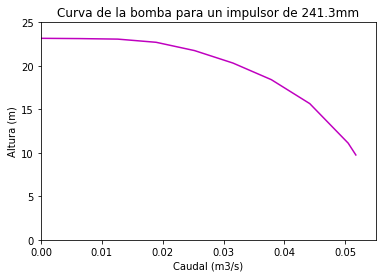

In [68]:
datos  = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Grupo Hidráulica/N1_Datos_Curvabomba.csv', delimiter=';')

Qb = datos[:,0] * (3.785/1000)/60  #m3/s
hb = datos[:,1] * (0.3048)         #m

#Los datos extraídos del gráfico son los mismos que los del archivo .csv y son:
#Qb = np.array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 820.]) gal/min
#hb = np.array([76.  , 75.9 , 75.7 , 74.5 , 71.37, 66.67, 60.4 , 51.37, 36.47, 32.00]) ft

curva_bomba = interp1d(Qb, hb, fill_value='extrapolate')

plt.plot(Qb,hb,'m')
plt.xlim(0,0.055)
plt.ylim(0,25)
plt.xlabel("Caudal (m3/s)")
plt.ylabel("Altura (m)")
plt.title('Curva de la bomba para un impulsor de 241.3mm')
plt.show()

**2) Caracterización de la curva del sistema**

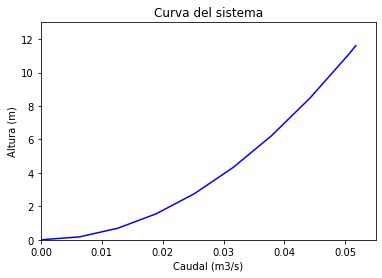

In [69]:
#Definición de constantes
g = 9.81 #m2/s

def curva_sistema(Q, k):
    L = 35   #m
    f = 0.015
    D = 0.1  #m
    He = 0
        
    hb = He + (f*(L/D) + k)*(8/(g*np.pi**2*D**4))*Q**2
      
    return hb

plt.plot(Qb, curva_sistema(Qb, 0),'b')
plt.xlim(0,0.055)
plt.ylim(0,13)
plt.xlabel("Caudal (m3/s)")
plt.ylabel("Altura (m)")
plt.title('Curva del sistema')
plt.show()

**3) Punto de funcionamiento** *(Intersección de las curvas)*

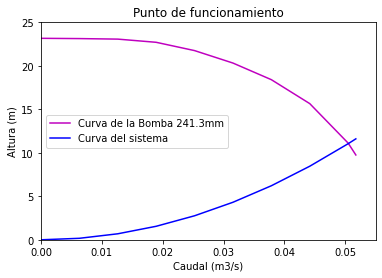

In [70]:
plt.plot(Qb,hb,'m', label = 'Curva de la Bomba 241.3mm')
plt.plot(Qb, curva_sistema(Qb, 0),'b', label = 'Curva del sistema')
plt.legend(loc = 'best')
plt.xlabel("Caudal (m3/s)")
plt.ylabel("Altura (m)")
plt.xlim(0,0.055)
plt.ylim(0,25)
plt.title('Punto de funcionamiento')
plt.show()

El punto de funcionamiento se puede leer de la gráfica, pero también se puede calcular en función de la constante k tal como se indica a continuación.

In [71]:
def calc_pf(k):
    
    def F(Q, k):
        return curva_bomba(Q) - curva_sistema(Q, k)
    
    Q_inicial = 0.025
    Q = fsolve(F, Q_inicial, args=(k,))[0]
    h = curva_sistema(Q, k)
    
    print(f"Q = {Q:.3f} m3/s, \nh = {h:.2f} m")

    Q_puntos = np.linspace(np.min(Qb), np.max(Qb), 100)
    plt.plot(Q_puntos, curva_bomba(Q_puntos),'b-', label = 'Curva de la Bomba 241.3mm')
    plt.plot(Q_puntos, curva_sistema(Q_puntos, k), 'r-', label = 'Curva del sistema')
    plt.plot(Q,h,'ok',)
    plt.plot([Q],[h])
    plt.ylim(0,25)
    plt.xlim(0,0.055)
    plt.xlabel('Caudal ' r'$\left(m^3/s\right)$')
    plt.ylabel('Altura ' r'$\left(m\right)$')
    plt.title('Punto de funcionamiento para un impulsor de 241.3'r'$\left(mm\right)$')  

Q = 0.051 m3/s, 
h = 11.07 m


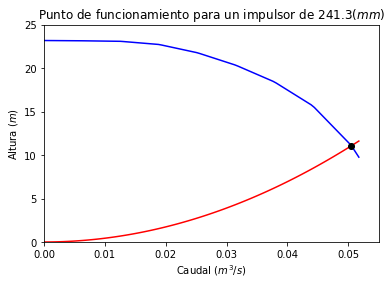

In [72]:
#Para k = 0
calc_pf(0)

¿Qué función cumple la válvula ubicada en la tubería de impulsión? Prueba cambiando los valores de k y comente.

In [76]:
wg.interact(calc_pf, k = (0,20,2))
plt.show()

interactive(children=(IntSlider(value=10, description='k', max=20, step=2), Output()), _dom_classes=('widget-i…

In [80]:
#Ahora un pequeño Quiz formativo para evaluar lo aprendido
!pip install -q easyquiz
